# Análise Sobre a Diferença de Gênero na UFRN

Projeto I - Segunda Unidade

Alunos:
- Noé Fernandes Carvalho Pessoa
- Giovanne dos Santos
- Kevin Wallacy

Nesse estudo, temos a missão de realizar uma análise sobre a diferença de gênero entre servidores, alunos e professores da
UFRN.
Por primeiro, analisaremos a diferença de gênero entre os servidores.

Antes de tudo, adicionamos as bibliotecas necessárias para a manipulação dos dados.

In [2]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Logo depois, atribuimos os links dos arquivos às variáveis servidores_url e discentes que serão posteriormente usadas.
Atribuimos o arquivo lido e as colunas úteis a variável servidores. Também é interessante usar a função dropna para retirar
as linhas com dados faltantes.

In [3]:
servidores_url = 'http://bit.do/servidores_ufrn'
servidores = pd.read_csv(servidores_url, sep=';', usecols = ['nome', 'situacao_servidor', 'unidade', 'admissao'])
servidores.dropna(inplace=True)

Nossa intenção agora é descobrir o número de admissões anuais da UFRN por gênero desde os primeiros registros até o ano
de 2018. Contudo, é possível perceber que a coluna admissao está em formato de string. Portanto, utilizamos a função 
str.split para retornar ao dataframe servidores a primeira posição da lista de strings gerada, que será o ano. Logo 
depois usamos a função astype para converter o valor do ano para inteiro.

In [5]:
servidores.loc[0:2]

,nome,situacao_servidor,unidade,admissao
0,ABIATA MARTINS,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1981-10-06 00:00:00
1,ABIGAIL CALDAS BATISTA GONDIM,Aposentado,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,1979-04-01 00:00:00
2,ABIGAIL DE ANDRADE SOUZA,Aposentado,DAP/PROGESP - DIRETORIA DE ADMINISTRACAO DE PE...,1969-10-21 00:00:00


In [3]:
servidores['admissao'] = servidores.admissao.str.split('-').str[0]
servidores['admissao'] = servidores['admissao'].astype(int)

Para uma visualização inicial, criamos o histograma que expressa o total de admissões da UFRN em cada um dos anos.
Para gerar o gráfico, inserimos como parâmetro a coluna asdmissao do dataframe. Além disso, o parâmetro bins é definido
como 75 com a intenção de que as "caixinhas" recebam as admissões anuais. Já a função range atribui ao gráfico o intervalo
considerado a construção do gráfico.

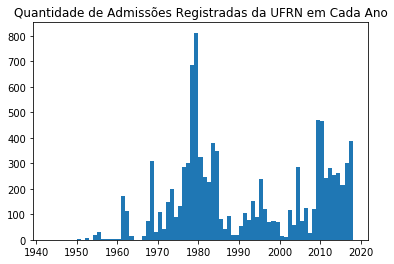

In [4]:
fig, ax = plt.subplots()
ax.hist(servidores.admissao, bins=75, range=(1943,2018))
plt.title("Quantidade de Admissões Registradas da UFRN em Cada Ano")
plt.show()

Antes de começarmos a análise de gênero precisamos identificar se o servidor é do sexo masculino e feminino. Para isso,
precisamos por meio de um código criar uma nova coluna no dataframe que expresse o sexo do indivíduo. Para resolver esse
problema temos a biblioteca genderBR, mas para usá-la é necessário instalar o Rstudio e carregá-lo no Jupyter. Logo, após
percorremos a coluna nome do dataframe, identificamos o gênero por meio do do R e retornamos os nomes que foram
identificados para a lista generos, que por sua vez é adicionada a uma nova coluna criada também nomeada generos (os nomes não indentificados foram retornados a lista, e consequentemente a coluna, como None).

In [ ]:
!conda install -c r rpy2 --y

In [4]:
import rpy2.robjects as robjects
%load_ext rpy2.ipython

In [5]:
%%R 
suppressMessages(library(genderBR))

In [29]:
generos = []
for i in servidores.nome:
    primeiro_nome = i.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    generos.append(genero)
    
servidores["generos"] = generos

In [31]:
servidores = servidores.to_csv("generos.csv")

In [8]:
servidores = pd.read_csv('generos.csv')
servidores.head()

,Unnamed: 0,nome,situacao_servidor,unidade,admissao,generos
0,0,ABIATA MARTINS,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1981,Male
1,1,ABIGAIL CALDAS BATISTA GONDIM,Aposentado,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,1979,Female
2,2,ABIGAIL DE ANDRADE SOUZA,Aposentado,DAP/PROGESP - DIRETORIA DE ADMINISTRACAO DE PE...,1969,Female
3,3,ABIGAIL MOURA,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1976,Female
4,4,ABILIO FONSECA DE SOUSA,Aposentado,REITORIA,1960,Male


Filtramos, então, o dataframe considerando o gênero do servidor. Retornamos, assim, à mulheres_info e homens_info
aquelas linhas nas quais os indivíduos foram indentificados como mulher e homem, respectivamente. Portanto, finalmente
podemos criar os histogramas que representarão a quantidade de admissões anuais de ambos os sexos. Então, criamos uma
figura de tamanho (12,10) e adicionamos dois outro espaços na figura nos quais serão contruídos os gráficos, atribuindo-os
as variáveis ax1 e ax2. Utilizando, praticamente os mesmos parâmetros do último gráfico, nós podemos gerar os novos dois
gráficos.

In [42]:
mulheres_info = servidores[servidores.generos == 'Female']
homens_info = servidores[servidores.generos == 'Male']

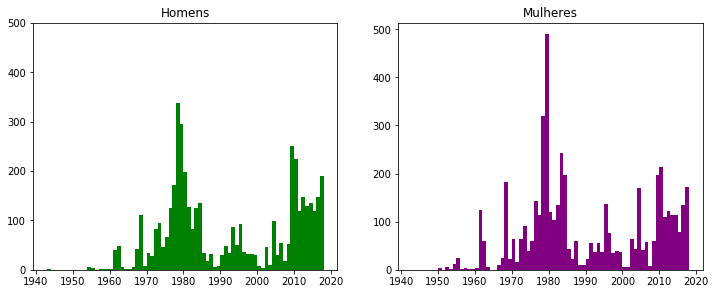

In [190]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax1.hist(homens_info.admissao, bins=75, range=(1943,2018), color='green')
ax2.hist(mulheres_info.admissao, bins=75, range=(1943,2018), color='purple')
ax1.set_ylim(0,500)
ax1.set_title("Homens")
ax2.set_title("Mulheres")
plt.show()

Agora, teremos como objetivo criar um gráfico de linha que expresse o quanto a percentagem de admissões de mulheres 
e homens variou ao longo dos anos, e também procurar saber se a há grande disparidade de valores.
Uma possível solução é criar tabelas por meio da função pivot_table, utilizando como índice a coluna admissao, e retornar
o valor total de pessoas admitidas, o número de homens admitidos e o número de mulheres admitidas em cada ano.
Retornamos as tabelas a total_admissoes, admissoes_mulheres e admissoes_homens, respectivamente.

In [44]:
total_admissoes = servidores.pivot_table(index='admissao', values='generos', aggfunc='count')
total_admissoes.head()

,generos
admissao,
1943,1
1950,4
1952,5
1953,1
1954,18


In [45]:
admissoes_mulheres = mulheres_info.pivot_table(index='admissao', values='generos', aggfunc='count') 
admissoes_mulheres.head()

,generos
admissao,
1950,4
1952,5
1953,1
1954,13
1955,25


Para obter uma nova tabela com a porcentagem de mulheres admitidas por ano, dividimos a tabela com o número de mulheres
pela tabela com o valor total de admissões, multiplicando por 100 para facilitar a visualização. É importante também
apagar os dados nulos que se formam pela divisão por zero e também utilizar a função reset_index para transformar o
índice admissao em coluna, para assim possibilitar a geração do gráfico.

In [46]:
porcentagem_mulheres = (admissoes_mulheres/total_admissoes)*100
porcentagem_mulheres.dropna(inplace=True)
porcentagem_mulheres.reset_index(inplace=True)
porcentagem_mulheres.head()

,admissao,generos
0,1950,100.000000
1,1952,100.000000
2,1953,100.000000
3,1954,72.222222
4,1955,86.206897


Esse novo gráfico usará tabela porcentagem_mulheres como referência. Para a primeira linha do gráfico, que representa a 
porcetagem de mulheres, teremos como parâmetro a coluna admissao para o eixo x e a coluna generos para o eixo y. Já para 
a segunda, que representa a porcentagem de homens, o eixo x será considerado como o complemento da porcentagem de
mulheres. Por esse motivo, subtrai-se a porcentagem de mulheres do 100.

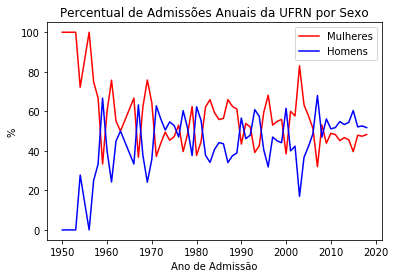

In [47]:
plt.plot(porcentagem_mulheres.admissao,porcentagem_mulheres.generos, c='red', label='Mulheres')
plt.plot(porcentagem_mulheres.admissao,100 - porcentagem_mulheres.generos, c = 'blue', label='Homens')
plt.legend(loc='best')
plt.xlabel("Ano de Admissão")
plt.ylabel("%")
plt.title("Percentual de Admissões Anuais da UFRN por Sexo")
plt.show()

Desta vez, temos o objetivo de criar gráficos de barra que representem o número de homens e mulheres que pertencem as três
maiores unidades da UFRN em número de servidores. Para isso, primeiramente, devemos filtrar o dataframe e considerar 
apenas as linhas cujo servidor é registrado como "Ativo permanente". Para encontrar essas três maiores unidades usaremos
um dicionário que receberá os valores da coluna unidades e guardará o número de vezes que eles se repetem. Tendo esses
valores, ordenamo-os em ordem descrescente.

In [48]:
servidores = servidores[servidores['situacao_servidor'] == 'Ativo Permanente']

In [49]:
servidores.head()

,nome,situacao_servidor,unidade,admissao,generos
4738,ABDO FARRET NETO,Ativo Permanente,DEPARTAMENTO DE MEDICINA INTEGRADA,2009,Male
4739,ABMAEL BEZERRA DE OLIVEIRA,Ativo Permanente,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,1973,Male
4740,ABNER CARLOS COSTA DE MELO,Ativo Permanente,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,2014,Male
4741,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,Ativo Permanente,CERES - DEPARTAMENTO DE HISTÓRIA,2016,Male
4742,ACACIA JESSICA MAIA DE MOURA,Ativo Permanente,ESCOLA AGRÍCOLA DE JUNDIAÍ,2013,Female


In [50]:
#Difença em quantidade no numero total de servidores ***ativos*** da UFRN de ambos os sexos
servidores.generos.value_counts()

Male      2735
Female    2393
Name: generos, dtype: int64

In [63]:
conj_unidades = {}
lista_unidades = []
for i in servidores.unidade:
    lista_unidades.append(i)
for i in lista_unidades:
    if i in conj_unidades:
        conj_unidades[i] += 1
    else:
        conj_unidades[i] = 1

In [65]:
sorted(conj_unidades.items(), key=lambda x: x[1],reverse=True)[:3]

[('EBSERH - DIVISÃO DE GESTÃO DE CUIDADO', 230),
 ('EBSERH - DIVISÃO DE APOIO DIAGNOSTICO E TERAPEUTICO', 199),
 ('ESCOLA AGRÍCOLA DE JUNDIAÍ', 184)]

Atribuimos, então, atráves das funções value_counts e values, as listas com o numero de homens e mulheres de cada umas 
das três unidades. Para efeito de organização trocamos a posição dos valores da lista EBSERH1 e EBSERH2 já que a função 
values organiza a lista do maior valor para o menor e isso não é interessante no nosso contexto.

In [167]:
EBSERH1 = servidores[(servidores.unidade == 'EBSERH - DIVISÃO DE GESTÃO DE CUIDADO')].generos.value_counts().values
EBSERH2 = servidores[(servidores.unidade == 'EBSERH - DIVISÃO DE APOIO DIAGNOSTICO E TERAPEUTICO')].generos.value_counts().values
EAJ = servidores[(servidores.unidade == 'ESCOLA AGRÍCOLA DE JUNDIAÍ')].generos.value_counts().values
EBSERH1 = [EBSERH1[1],EBSERH1[0]]
EBSERH2 = [EBSERH2[1],EBSERH2[0]]

Agora, geramos uma figura de tamanho (14,10) e adicionamos trẽs espaços nela aonde serão alocados os gráficos atráves da
função add_subplot. Como para gerar os três gráficos de barras precisaremos da posição dos índices no eixo x, aonde as barras serão colocadas, importamos a função arange do numpy para gerar e indicar essa posição. Adicionamos ainda como
parâmetro as listas com os valores gerados anteriormente, a largura das barras e suas cores. Também limitamos o eixo y a um
interval de 0 a 200 e, através da função range, organizamos os índices e fornecemos legendas que referenciam associam as
barras aos gêneros que elas representam.

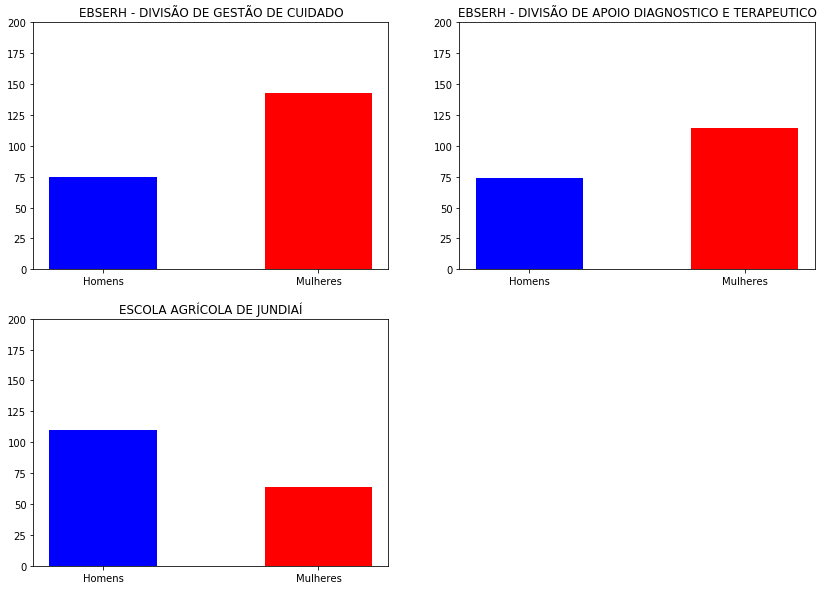

In [189]:
from numpy import arange
fig = plt.figure(figsize=(14,10)) 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
posicao = arange(2) + 1
coluna = ['Homens', 'Mulheres']
ax1.bar(posicao,EBSERH1,0.5,color=['blue','red'])
ax2.bar(posicao,EBSERH2,0.5, color=['blue','red'])
ax3.bar(posicao,EAJ,0.5,color=['blue','red'])
ax1.set_ylim(0,200)
ax2.set_ylim(0,200)
ax3.set_ylim(0,200)
indices = range(1,3)
ax1.set_xticks(indices)
ax2.set_xticks(indices)
ax3.set_xticks(indices)
ax1.set_xticklabels(coluna)
ax2.set_xticklabels(coluna)
ax3.set_xticklabels(coluna)
ax1.set_title("EBSERH - DIVISÃO DE GESTÃO DE CUIDADO")
ax2.set_title("EBSERH - DIVISÃO DE APOIO DIAGNOSTICO E TERAPEUTICO")
ax3.set_title("ESCOLA AGRÍCOLA DE JUNDIAÍ")
plt.show()
# Gráfico que representa o numero de homens e mulheres nas 3 unidades com mais servidoress 

Agora partiremos para a análise da diferença de gênero entre os alunos. Para tal primeiramente, lemos o arquivo dos 
discentes ingressantes do ano de 2018 e geramos novamente uma coluna que identifica o gênero do aluno.

In [9]:
ingressantes = pd.read_csv(discentes2018, sep=';')

In [10]:
ingressantes.loc[0:2]

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,20180057132,AADRIAN ANDREW COSTA BORGES,2018,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000034.0,ESTATÍSTICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
1,20183023601,ABDA ROCHA PINHEIRO,2018,1.0,PROCESSO SELETIVO,REGULAR,ATIVO,T,TÉCNICO,5401.0,TÉCNICO DE MÚSICA (REGÊNCIA),PRESENCIAL,284.0,ESCOLA DE MÚSICA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,20180107403,ABDON FRANCISCO SANTANA NETO,2018,2.0,SiSU,REGULAR,CADASTRADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [11]:
genero_ingressante = []
for i in ingressantes.nome_discente:
    primeiro_nome = i.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    genero_ingressante.append(genero)
    
ingressantes["generos"] = genero_ingressante

In [ ]:
ingressantes.to_csv("ingressantes2018.csv")
ingressantes.loc[0:2]

Teremos agora o objetivo de representar graficamente a quantidade de alunos das áreas de exatas e humanas do campus
central da UFRN. Para isso, precisamos filtrar o dataframe ingressantes para obter as linhas que satisfazem os 
requerimentos necessários para representar um aluno de exatas ou humanas. Atribuímos os resultados às variáveis de mesmo
nome.

In [14]:
ingressantes.generos.value_counts()

Male      5333
Female    4066
Name: generos, dtype: int64

In [15]:
exatas = ingressantes[((ingressantes.nome_unidade_gestora == 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA') | 
                       (ingressantes.nome_unidade_gestora == 'CENTRO DE TECNOLOGIA') | 
                       (ingressantes.nome_curso == 'TECNOLOGIA DA INFORMAÇÃO')) & 
                      (ingressantes.nivel_ensino == 'GRADUAÇÃO')]
exatas.generos.value_counts()

Male      1087
Female     415
Name: generos, dtype: int64

In [16]:
humanas = ingressantes[((ingressantes.nome_unidade_gestora == 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES') | 
                       (ingressantes.nome_unidade_gestora == 'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS') | 
                       (ingressantes.nome_curso == 'CENTRO DE EDUCAÇÃO')) & 
                      (ingressantes.nivel_ensino == 'GRADUAÇÃO')]
humanas.generos.value_counts()

Male      911
Female    905
Name: generos, dtype: int64

Logo baixo, criamos uma figura de tamanho (15,12) na qual inserimos dois espaços que representaram a área de
exatas e humanas. Usamos as funções value_counts e values para retornar às variáveis valor1 e valor2 as listas com o 
número de homens e mulheres que pertencem as áreas de conhecimento. Então posicionamos as barras nos gráficos a partir da
função arange e os índices apartir da função range. Já como parâmetro para os dois gráficos, além da posição, fornecemos
as listas valor1 e valor2, a largura das barras e a cor que representa cada gênero. Para efeito de organização, definimos
o eixo y no intervalo entre 0 e 1500.

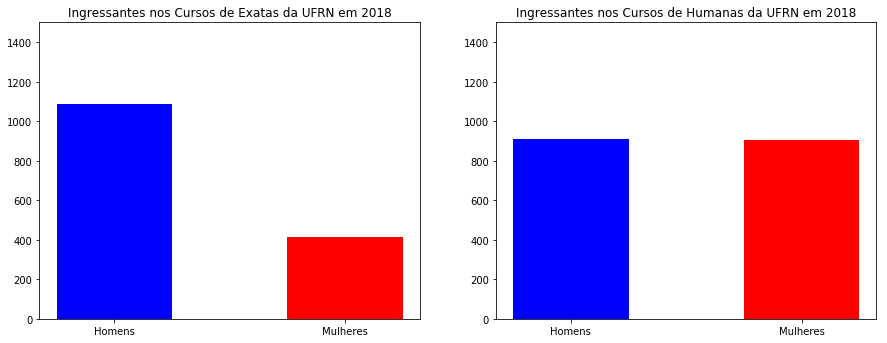

In [17]:
from numpy import arange
valor1 = exatas.generos.value_counts().values
valor2 = humanas.generos.value_counts().values
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
posicao = arange(2) + 1
indice = range(1,3)
ax1.set_xticks(indice)
ax1.set_xticklabels(["Homens","Mulheres"])
ax1.bar(posicao,valor1, 0.5, color = ['blue','red'])
ax1.set_ylim(0,1500)
ax1.set_title("Ingressantes nos Cursos de Exatas da UFRN em 2018")

ax2.set_xticks(indice)
ax2.set_xticklabels(["Homens","Mulheres"])
ax2.set_ylim(0,1500)
ax2.bar(posicao,valor2, 0.5, color = ['blue','red'])
ax2.set_title("Ingressantes nos Cursos de Humanas da UFRN em 2018")
plt.show()

Tentaremos agora concluir a quantidade de mestrandos e doutorandos, independentemente da área de conhecimento a qual
pertence. Diante disso, novamente filtramos aqueles discentes que pertencem a cada um desses níveis de ensino e atribuimos
os resultados a variável mestrado e doutorado. Portanto, utilizando o mesmo padrão da figura anterior podemos construir
os dois gráficos com facilidade.

In [18]:
mestrado = ingressantes[ingressantes.nivel_ensino == 'MESTRADO']
mestrado.generos.value_counts()

Male      419
Female    391
Name: generos, dtype: int64

In [19]:
doutorado = ingressantes[ingressantes.nivel_ensino == 'DOUTORADO']
doutorado.generos.value_counts()

Female    146
Male      115
Name: generos, dtype: int64

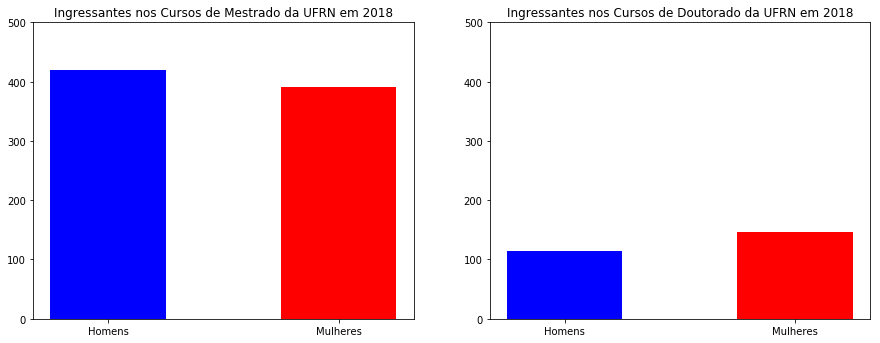

In [20]:
fig = plt.figure(figsize=(15,12))
valor1 = mestrado.generos.value_counts().values
valor2 = doutorado.generos.value_counts().values
valor2 = [valor2[1],valor2[0]]
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
posicao = arange(2) + 1
indice = range(1,3)
ax1.set_xticks(indice)
ax1.set_xticklabels(["Homens","Mulheres"])
ax1.bar(posicao,valor1, 0.5, color = ['blue','red'])
ax1.set_ylim(0,500)
ax1.set_title("Ingressantes nos Cursos de Mestrado da UFRN em 2018")

ax2.set_xticks(indice)
ax2.set_xticklabels(["Homens","Mulheres"])
ax2.set_ylim(0,500)
ax2.bar(posicao,valor2, 0.5, color = ['blue','red'])
ax2.set_title("Ingressantes nos Cursos de Doutorado da UFRN em 2018")
plt.show()

In [6]:
ingressantes2017 = 'http://bit.do/discentes_2017'
ingressantes2016 = 'http://bit.do/discentes_2016'
ingressantes2015 = 'http://bit.do/discentes_2015'
ingressantes2014 = 'http://bit.do/discentes_2014'
ingressantes2013 = 'http://bit.do/discentes_2013'
ingressantes2012 = 'http://bit.do/discentes_2012'

ingressantes_2017 = pd.read_csv(ingressantes2017, sep=';')
ingressantes_2016 = pd.read_csv(ingressantes2016, sep=';')
ingressantes_2015 = pd.read_csv(ingressantes2015, sep=';')
ingressantes_2014 = pd.read_csv(ingressantes2014, sep=';')
ingressantes_2013 = pd.read_csv(ingressantes2013, sep=';')
ingressantes_2012 = pd.read_csv(ingressantes2012, sep=';')

In [7]:
#Substituimos o valor incorreto 2009 para 2017
ingressantes_2017['ano_ingresso'] = 2017

In [8]:
lista_ingressantes = []

for i in range(12,18):
    lista_ingressantes.append(vars()['ingressantes_20%d' % (i)])

In [9]:
total_ingressantes = pd.concat(lista_ingressantes)
total_ingressantes.reset_index(drop=True, inplace=True)

In [ ]:
total_ingressantes.shape

In [ ]:
genero_ingressantes = []
for i in total_ingressantes.nome_discente:
    primeiro_nome = i.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    genero_ingressantes.append(genero)
    
total_ingressantes["generos"] = genero_ingressantes

In [ ]:
total_ingressantes.to_csv("total_ingressantes.csv")

In [ ]:
ingressantes_exatas = total_ingressantes[((ingressantes.nome_unidade_gestora == 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA') | 
                       (ingressantes.nome_unidade_gestora == 'CENTRO DE TECNOLOGIA') | 
                       (ingressantes.nome_curso == 'TECNOLOGIA DA INFORMAÇÃO')) & 
                      (ingressantes.nivel_ensino == 'GRADUAÇÃO')]

In [ ]:
total_exatas = ingressantes_exatas.pivot_table(index='ano_ingresso', values='generos', aggfunc='count')

In [ ]:
mulheres_exatas = ingressantes_exatas[ingressantes_exatas.generos == 'Female']
mulheres = mulheres_exatas.pivot_table(index='ano_ingresso', values='genero', aggfunc='count')
mulheres.head()

In [ ]:
porcentagem_mulheres_exatas = mulheres_exatas/total_exatas*100
porcentagem_mulheres.head()

In [ ]:
plt.plot(porcentagem_mulheres_exatas.ano_ingresso,porcentagem_mulheres_exatas.generos,c='red',label='Mulheres')
plt.plot(porcentagem_mulheres_exatas.ano_ingresso,100 - porcentagem_mulheres_exatas.generos,c='blue',label='Homens')
plt.legend(loc='best')
plt.title("Diferença percentual por gênero no ingresso entre 2012 a 2017")
plt.ylabel("%")
plt.show()

Partimos agora para análise dos professores

In [ ]:
url_docentes = 'http://bit.do/docentes_ufrn'
docentes = pd.read_csv(url_docentes, sep=';', usecols='nome','formacao','admissao','lotacao')

In [ ]:
docentes['admissao'] = docentes.admissao.str.split('-').str[0]
servidores['admissao'] = docentes['admissao'].astype(int)

In [ ]:
generos = []
for i in docentes.nome:
    primeiro_nome = i.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    generos.append(genero)
    
docentes["generos"] = generos

In [ ]:
docentes.to_csv("docentes.csv")

In [ ]:
professoras = docentes[docentes.generos == 'Female']

In [ ]:
total_professores = docentes.pivot_table(index='admissao', values='generos', aggfunc='count')
num_professoras = professoras.pivot_table(index='admissao', values='generos', aggfunc'count') 

In [ ]:
porcentagem_professoras = num_professoras/total_professores*100

In [ ]:
plt.plot(porcentagem_professoras.admissao, porcentagem_professoras.generos, c='red', label='Mulheres')
plt.plot(porcentagem_professoras.admissao, 100 - porcentagem_professoras.generos, c='blue', label='Homens')
plt.ylabel("%")
plt.title("Porcentagem de homens e mulheres na docência na UFRN")
plt.show()